# KORELASI DAN CLUSTERING PADA DATASET IMPACT OF REMOTE WORK ON MENTAL HEALTH

**23083010003 Bunga Aprilian**

**23083010019 Amelia Zafira Karnaen**

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sms
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
data = pd.read_csv( "/content/Impact_of_Remote_Work_on_Mental_Health.csv" )

In [ ]:
data.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


In [ ]:
data.shape

(5000, 20)

In [ ]:
data.dtypes

,0
Employee_ID,object
Age,int64
Gender,object
Job_Role,object
Industry,object
Years_of_Experience,int64
Work_Location,object
Hours_Worked_Per_Week,int64
Number_of_Virtual_Meetings,int64
Work_Life_Balance_Rating,int64


In [ ]:
data.columns = data.columns.str.strip().str.lower()

In [ ]:
data.drop('employee_id', axis=1, inplace=True)

In [ ]:
print(data.isnull().sum())

age                                     0
gender                                  0
job_role                                0
industry                                0
years_of_experience                     0
work_location                           0
hours_worked_per_week                   0
number_of_virtual_meetings              0
work_life_balance_rating                0
stress_level                            0
mental_health_condition              1196
access_to_mental_health_resources       0
productivity_change                     0
social_isolation_rating                 0
satisfaction_with_remote_work           0
company_support_for_remote_work         0
physical_activity                    1629
sleep_quality                           0
region                                  0
dtype: int64


In [ ]:
# Mengisi missing values dengan modus karena kolom bertipe kategorik
categorical_columns = data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    data[column] = data[column].fillna(data[column].mode()[0])

print(data.isnull().sum())

age                                  0
gender                               0
job_role                             0
industry                             0
years_of_experience                  0
work_location                        0
hours_worked_per_week                0
number_of_virtual_meetings           0
work_life_balance_rating             0
stress_level                         0
mental_health_condition              0
access_to_mental_health_resources    0
productivity_change                  0
social_isolation_rating              0
satisfaction_with_remote_work        0
company_support_for_remote_work      0
physical_activity                    0
sleep_quality                        0
region                               0
dtype: int64


## STATISTIKA DESKRIPTIF DAN VISUALISASI

In [ ]:
data.describe()

,age,years_of_experience,hours_worked_per_week,number_of_virtual_meetings,work_life_balance_rating,social_isolation_rating,company_support_for_remote_work
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,40.995000,17.810200,39.614600,7.559000,2.984200,2.993800,3.007800
std,11.296021,10.020412,11.860194,4.636121,1.410513,1.394615,1.399046
min,22.000000,1.000000,20.000000,0.000000,1.000000,1.000000,1.000000
25%,31.000000,9.000000,29.000000,4.000000,2.000000,2.000000,2.000000
50%,41.000000,18.000000,40.000000,8.000000,3.000000,3.000000,3.000000
75%,51.000000,26.000000,50.000000,12.000000,4.000000,4.000000,4.000000
max,60.000000,35.000000,60.000000,15.000000,5.000000,5.000000,5.000000


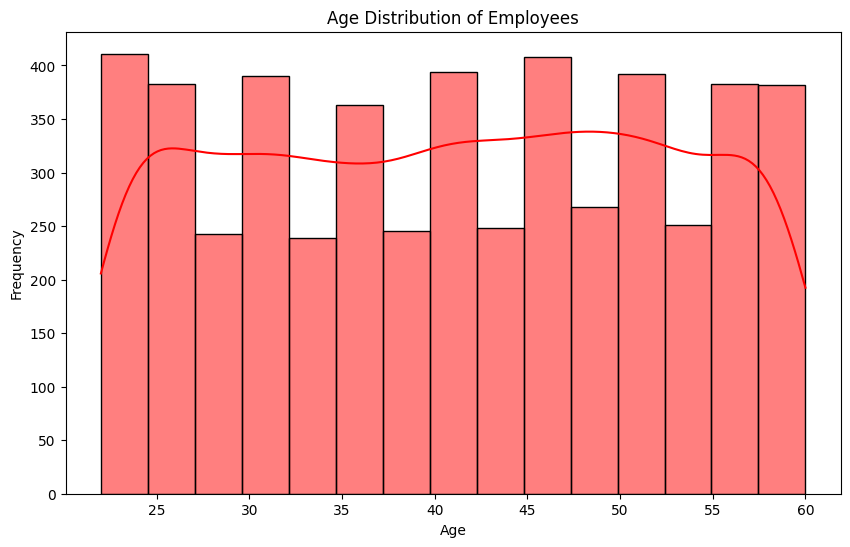

In [ ]:
# Plotting the age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=15, kde=True, color='red')
plt.title('Age Distribution of Employees')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

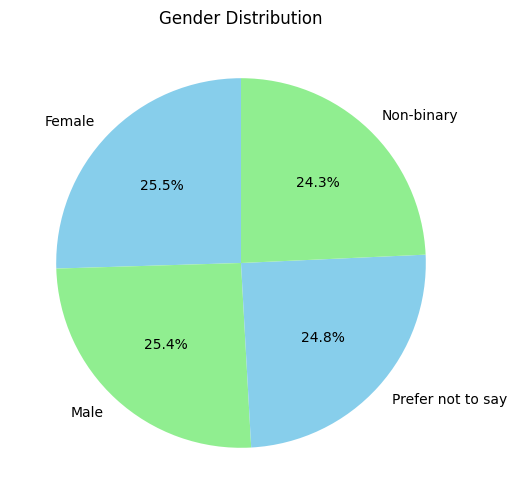

In [ ]:
# Pie chart for gender distribution
gender_counts = data['gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])
plt.title('Gender Distribution')
plt.show()

<ipython-input-14-fd073d772742>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y='job_role', order=data['job_role'].value_counts().index, palette='viridis')


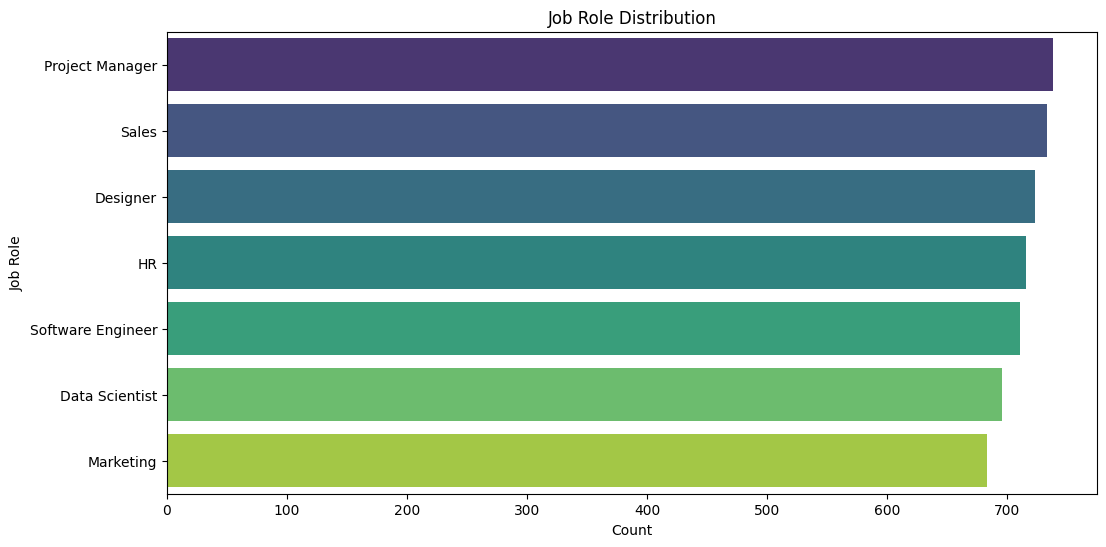

In [ ]:
# Job role distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='job_role', order=data['job_role'].value_counts().index, palette='viridis')
plt.title('Job Role Distribution')
plt.xlabel('Count')
plt.ylabel('Job Role')
plt.show()

<ipython-input-15-21facb8259e5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y='industry', order=data['industry'].value_counts().index, palette='magma')


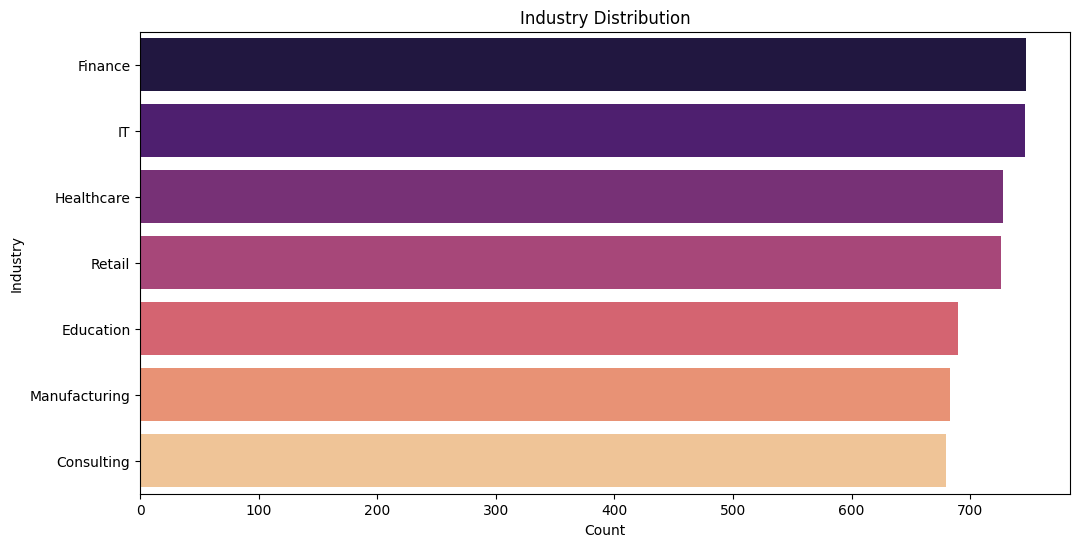

In [ ]:
# Industry distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='industry', order=data['industry'].value_counts().index, palette='magma')
plt.title('Industry Distribution')
plt.xlabel('Count')
plt.ylabel('Industry')
plt.show()

<ipython-input-16-7d4a303c3b6f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='years_of_experience', y='satisfaction_with_remote_work', palette='coolwarm')


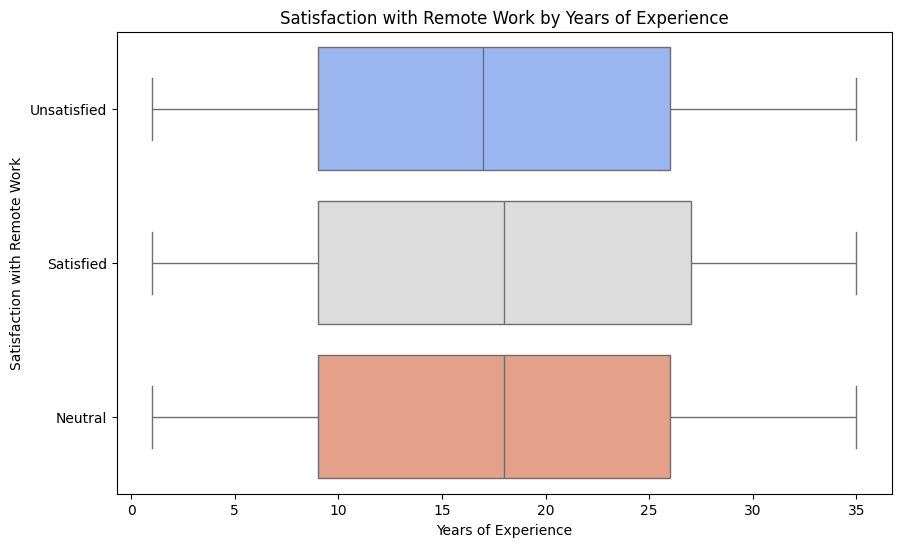

In [ ]:
# Boxplot for Years of Experience vs. Satisfaction with Remote Work
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='years_of_experience', y='satisfaction_with_remote_work', palette='coolwarm')
plt.title('Satisfaction with Remote Work by Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Satisfaction with Remote Work')
plt.show()

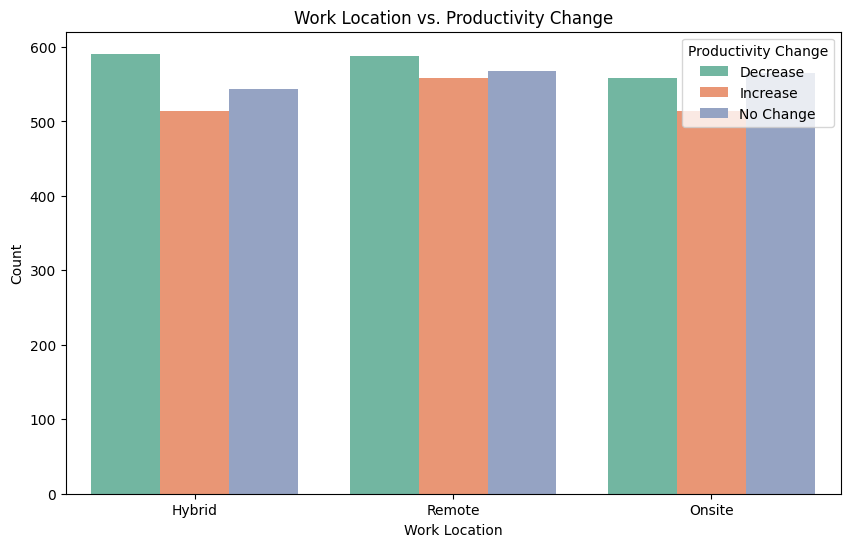

In [ ]:
# Bar plot for Work Location vs. Productivity Change
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='work_location', hue='productivity_change', palette='Set2')
plt.title('Work Location vs. Productivity Change')
plt.xlabel('Work Location')
plt.ylabel('Count')
plt.legend(title='Productivity Change')
plt.show()

<ipython-input-18-7443c7e22fa2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='work_life_balance_rating', palette='pastel')


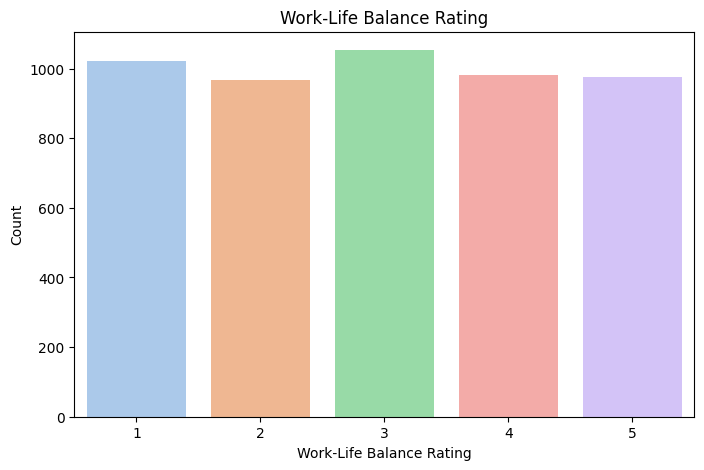

In [ ]:
# Countplot for Work-Life Balance Rating
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='work_life_balance_rating', palette='pastel')
plt.title('Work-Life Balance Rating')
plt.xlabel('Work-Life Balance Rating')
plt.ylabel('Count')
plt.show()

<ipython-input-19-d2245f8364ea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='mental_health_condition', palette='Set1')


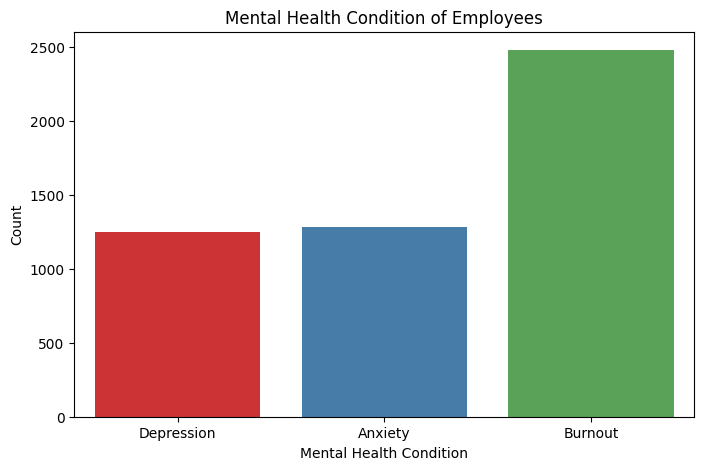

In [ ]:
# Countplot for Mental Health Condition
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='mental_health_condition', palette='Set1')
plt.title('Mental Health Condition of Employees')
plt.xlabel('Mental Health Condition')
plt.ylabel('Count')
plt.show()

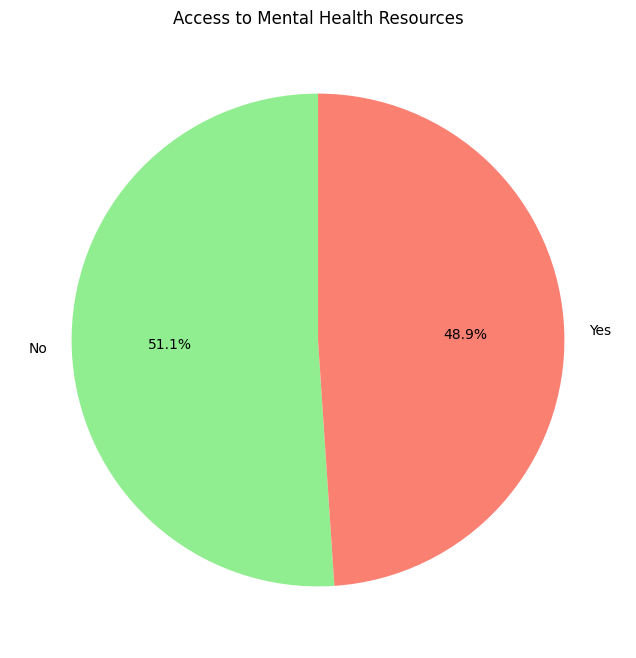

In [ ]:
# Pie chart for Access to Mental Health Resources
plt.figure(figsize=(8, 8))
data['access_to_mental_health_resources'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'salmon'])
plt.title('Access to Mental Health Resources')
plt.ylabel('')
plt.show()

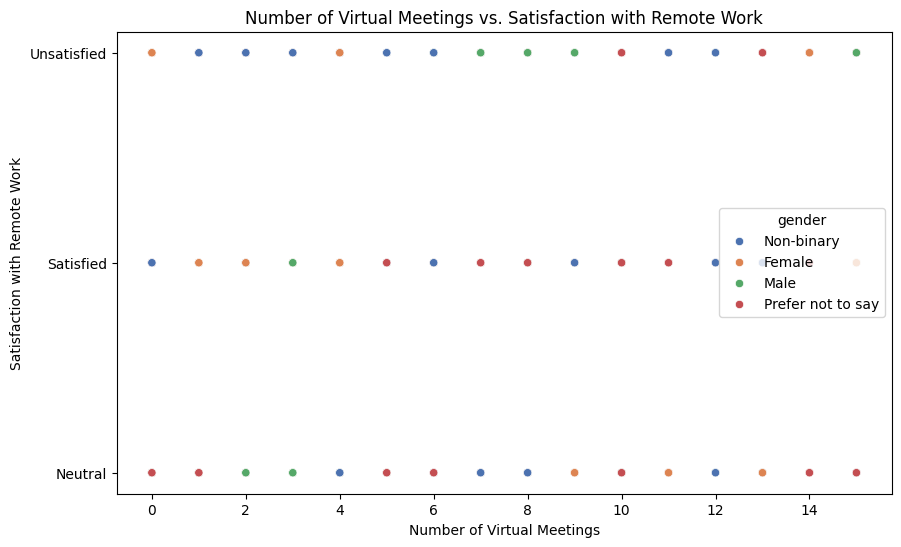

In [ ]:
# Scatter plot for Number of Virtual Meetings vs. Satisfaction with Remote Work
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='number_of_virtual_meetings', y='satisfaction_with_remote_work', hue='gender', palette='deep')
plt.title('Number of Virtual Meetings vs. Satisfaction with Remote Work')
plt.xlabel('Number of Virtual Meetings')
plt.ylabel('Satisfaction with Remote Work')
plt.show()

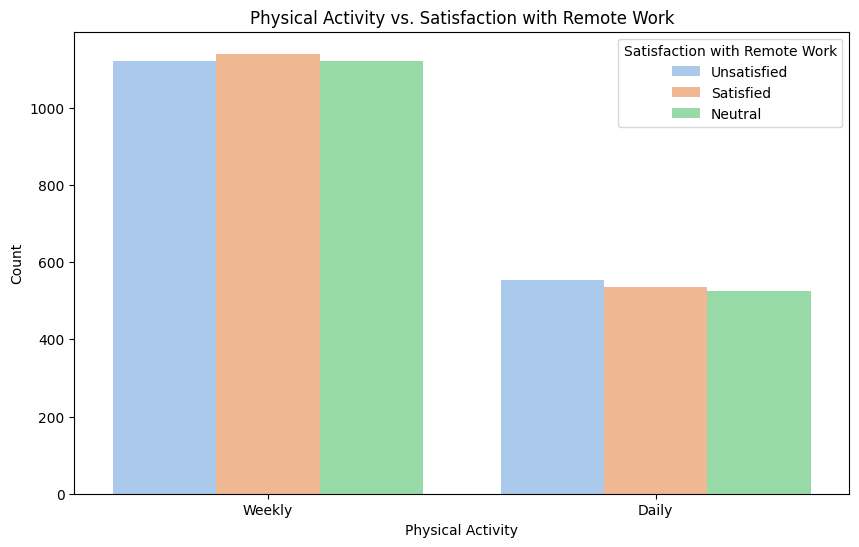

In [ ]:
# Bar plot for Physical Activity vs. Satisfaction with Remote Work
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='physical_activity', hue='satisfaction_with_remote_work', palette='pastel')
plt.title('Physical Activity vs. Satisfaction with Remote Work')
plt.xlabel('Physical Activity')
plt.ylabel('Count')
plt.legend(title='Satisfaction with Remote Work')
plt.show()

## ANALISIS KORELASI

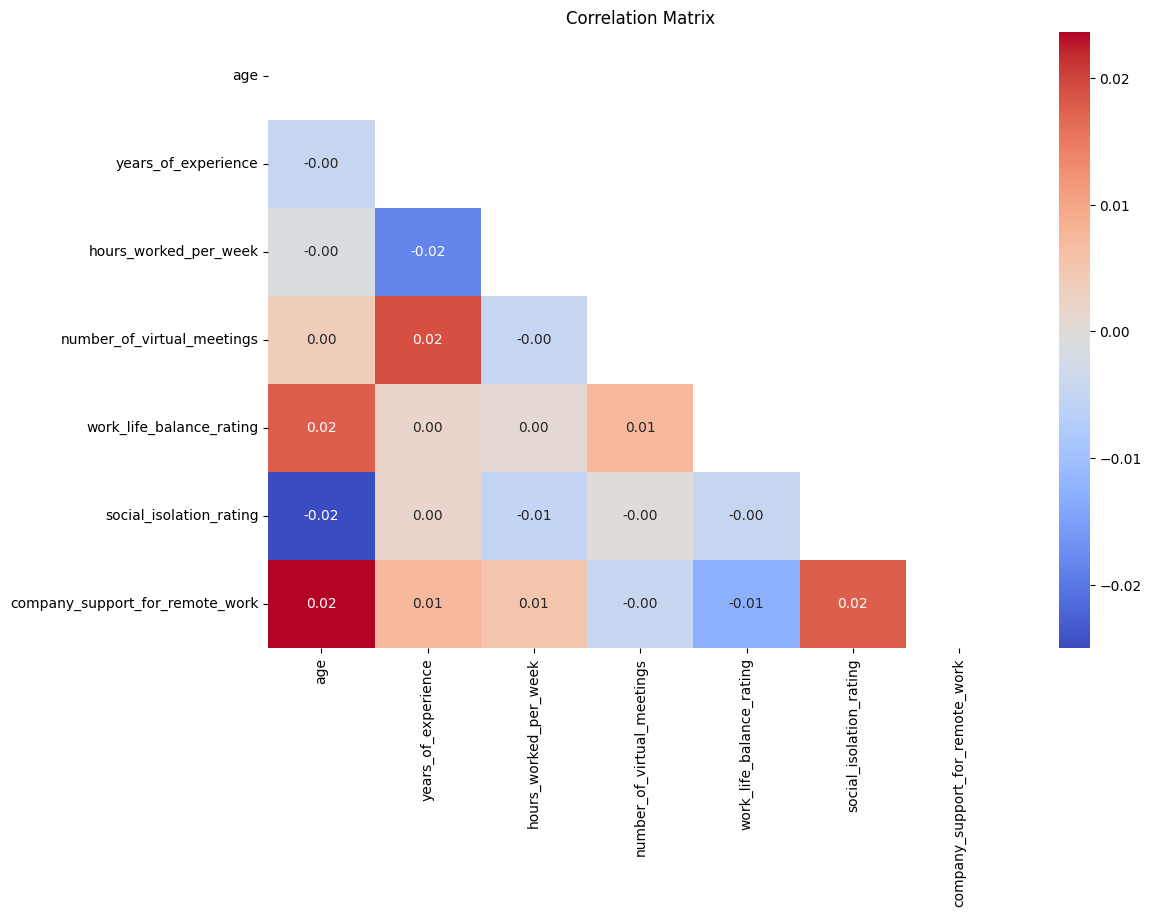

In [ ]:
# Correlation matrix heatmap with only numeric columns
plt.figure(figsize=(12, 8))
numeric_data = data.select_dtypes(include=[np.number])  # Select only numeric columns
correlation_matrix = numeric_data.corr()

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', mask=np.triu(correlation_matrix))
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Korelasi untuk setiap variabel
correlation_matrix = numeric_data.corr()
print("\nMatriks Korelasi:\n", correlation_matrix)


Matriks Korelasi:
                                       age  years_of_experience  \
age                              1.000000            -0.004480   
years_of_experience             -0.004480             1.000000   
hours_worked_per_week           -0.001352            -0.018537   
number_of_virtual_meetings       0.003617             0.019043   
work_life_balance_rating         0.017697             0.001698   
social_isolation_rating         -0.024992             0.001691   
company_support_for_remote_work  0.023673             0.007240   

                                 hours_worked_per_week  \
age                                          -0.001352   
years_of_experience                          -0.018537   
hours_worked_per_week                         1.000000   
number_of_virtual_meetings                   -0.004609   
work_life_balance_rating                      0.000820   
social_isolation_rating                      -0.005006   
company_support_for_remote_work              

## KRITERIA PEMILIHAN CLUSTER

Clusters: 2, Silhouette Score: 0.32
Clusters: 3, Silhouette Score: 0.33
Clusters: 4, Silhouette Score: 0.33
Clusters: 5, Silhouette Score: 0.31
Clusters: 6, Silhouette Score: 0.33
Clusters: 7, Silhouette Score: 0.33
Clusters: 8, Silhouette Score: 0.31
Clusters: 9, Silhouette Score: 0.32
Clusters: 10, Silhouette Score: 0.32


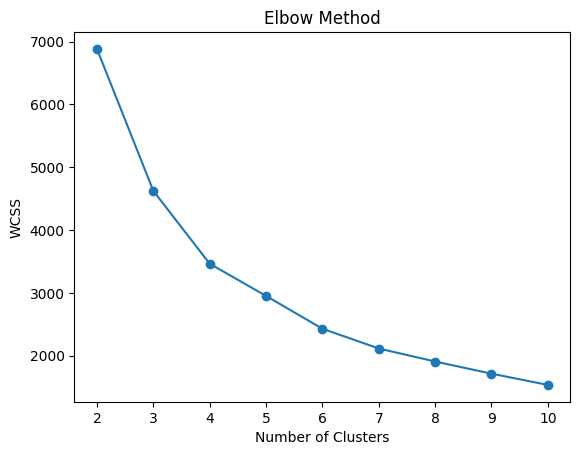

In [ ]:
# Encoding categorical variables
cat_cols = ['region', 'mental_health_condition', 'work_location', 'industry', 'job_role', 'gender',
            'productivity_change', 'stress_level', 'access_to_mental_health_resources', 'satisfaction_with_remote_work',
            'physical_activity','sleep_quality']
num_cols = ['age', 'years_of_experience', 'hours_worked_per_week',
            'number_of_virtual_meetings', 'work_life_balance_rating',
            'social_isolation_rating', 'company_support_for_remote_work']

for col in cat_cols:
    dummies = pd.get_dummies(data[col], prefix=col, drop_first=True)
    data = pd.concat([data, dummies], axis=1)
    data.drop(col, axis=1, inplace=True)

# Standardization
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[num_cols])

# PCA for dimensionality reduction
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Determining optimal number of clusters
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_pca)
    wcss.append(kmeans.inertia_)
    print(f"Clusters: {i}, Silhouette Score: {silhouette_score(data_pca, kmeans.labels_):.2f}")

plt.plot(range(2, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

## ANALISIS CLUSTER

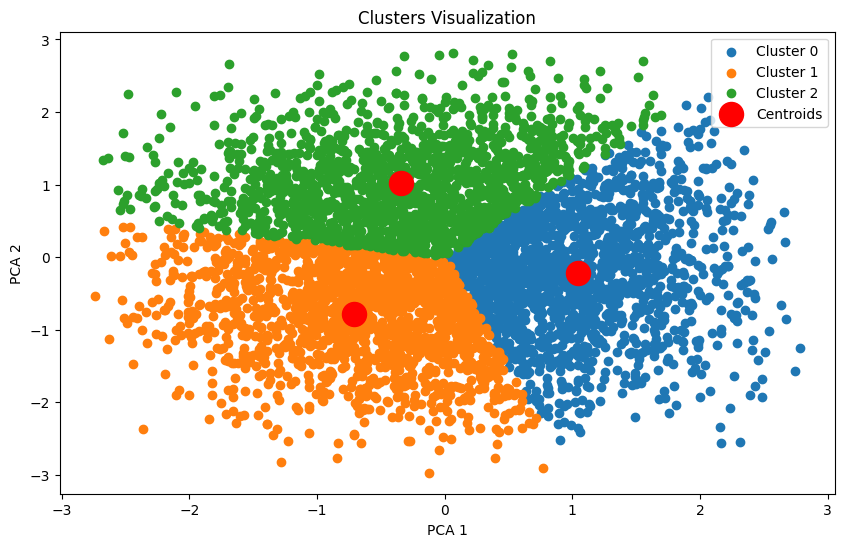

               age  years_of_experience  hours_worked_per_week  \
cluster                                                          
0        48.628878            15.232100              42.050716   
1        35.461308            13.303539              43.330534   
2        38.840676            24.951720              33.412191   

         number_of_virtual_meetings  work_life_balance_rating  \
cluster                                                         
0                          7.598449                  3.591885   
1                          5.169166                  2.354529   
2                          9.923355                  3.003018   

         social_isolation_rating  company_support_for_remote_work  
cluster                                                            
0                       2.129475                         2.946301  
1                       3.480504                         3.078584  
2                       3.378395                         2.998793  


In [ ]:
# Final KMeans Clustering
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(data_pca)
data['cluster'] = kmeans.labels_

# Visualizing Clusters
plt.figure(figsize=(10, 6))
for cluster in range(optimal_clusters):
    plt.scatter(data_pca[kmeans.labels_ == cluster, 0],
                data_pca[kmeans.labels_ == cluster, 1],
                label=f'Cluster {cluster}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='red', label='Centroids')
plt.title('Clusters Visualization')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

# Cluster Profiling
cluster_profiles = data.groupby('cluster')[num_cols].mean()
print(cluster_profiles)